<a href="https://colab.research.google.com/github/Umeshtheru/ML_API_Heroku/blob/main/CIFAR_10_OBject_Recognisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle

In [3]:
# Configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#dataset api
!kaggle competitions download -c cifar-10

 99% 711M/715M [00:08<00:00, 82.0MB/s]
100% 715M/715M [00:08<00:00, 89.3MB/s]


In [5]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [9]:
#extracting the compessed dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [10]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [11]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 94.8 MB/s eta 0:00:00


In [12]:
import py7zr

archive =py7zr.SevenZipFile('/content/train.7z', mode ='r')
archive.extractall()
archive.close()

In [13]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Import the Dependencies

In [14]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [36]:
filenames=os.listdir('/content/train')
filenames

['46157.png',
 '40648.png',
 '20710.png',
 '32421.png',
 '46471.png',
 '23731.png',
 '42469.png',
 '38600.png',
 '45593.png',
 '43748.png',
 '17401.png',
 '28514.png',
 '11687.png',
 '159.png',
 '47644.png',
 '46323.png',
 '48930.png',
 '42967.png',
 '27055.png',
 '17452.png',
 '204.png',
 '27735.png',
 '5974.png',
 '44204.png',
 '36909.png',
 '26425.png',
 '4855.png',
 '40071.png',
 '27462.png',
 '8216.png',
 '12965.png',
 '24535.png',
 '33023.png',
 '1909.png',
 '6457.png',
 '5017.png',
 '44222.png',
 '26801.png',
 '14421.png',
 '40875.png',
 '15559.png',
 '44559.png',
 '37963.png',
 '48660.png',
 '49448.png',
 '3425.png',
 '48677.png',
 '23246.png',
 '44286.png',
 '9718.png',
 '46623.png',
 '8794.png',
 '44161.png',
 '41567.png',
 '32902.png',
 '46385.png',
 '376.png',
 '16921.png',
 '34509.png',
 '43203.png',
 '7550.png',
 '39900.png',
 '36891.png',
 '30780.png',
 '48267.png',
 '29432.png',
 '47343.png',
 '25827.png',
 '16901.png',
 '40076.png',
 '1063.png',
 '14583.png',
 '23299.p

In [34]:
#Labels Processing
lable_df= pd.read_csv('/content/trainLabels.csv')


In [28]:
lable_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [33]:
lable_df['label']=lable_df['label'].replace({'airplane':0,'automobile':1,'frog':2,'truck':3,'deer':4,'bird':5,'horse':6,'ship':7,'cat':8,'dog':9})

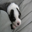

In [35]:
#displayinh sample image
import cv2
from google.colab.patches import cv2_imshow

img=cv2.imread('/content/train/45888.png')
cv2_imshow(img)

In [55]:
#Image Processing
#convert images to numpy arrays
id_list = list(lable_df['id'])
train_data_folder = '/content/train/'
for id in id_list:
  image = Image.open(train_data_folder + str(id)+'.png')
